### Load Images 
### Run the predictions here.


## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

The Chosen Images are plotted below. In the Final_Notebook_With_Results notebook, I used 6 images. In this demonstration I am using only 5 of them. 

** IMAGE - 1 ** - ClassID - 1 and Sign Name - Speed Limit (30Km/hr)

** IMAGE - 2 ** - ClassID - 28 and Sign Name - Children Crossing

** IMAGE - 3 ** - ClassID - 26 and Sign Name - Traffic Signals

** IMAGE - 4 ** - ClassID - 14 and Sign Name - Stop

** IMAGE - 5 ** - ClassID - 17 and Sign Name - No Entry

Please note that the numbering might be different but, the image ID and the name for the sign have been carefully, verified by plotting as shown below. 

The test images are completely new, and are signs that the clsasifier should be in a position to classify effectively.

In [1]:
# Importing all required libraries and modules 

import os
from scipy import misc
import numpy as np
import tensorflow as tf

tf.reset_default_graph()

In [2]:
# Loading images from the directory

test_image_1 = misc.imread('images1.png')
test_image_2 = misc.imread('images2.png')
test_image_3 = misc.imread('images3.png')
#test_image_4 = misc.imread('images4.png')
test_image_5 = misc.imread('images5.png')
test_image_6 = misc.imread('images6.png')

In [3]:
# Resizing images to make it 32x32

test_image_1 = misc.imresize(test_image_1,(32,32)) # 1
test_image_2 = misc.imresize(test_image_2,(32,32)) # 28
test_image_3 = misc.imresize(test_image_3,(32,32)) # 26
#test_image_4 = misc.imresize(test_image_4,(32,32)) # 33
test_image_5 = misc.imresize(test_image_5,(32,32)) # 14
test_image_6 = misc.imresize(test_image_6,(32,32)) # 17


In [4]:
# Creating a single batch with all the test examples. 

final_list = test_image_1[np.newaxis, :]
final_list = np.vstack([final_list, test_image_2[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_3[np.newaxis, :]])
#final_list = np.vstack([final_list, test_image_4[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_5[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_6[np.newaxis, :]])

# setting the correct labels for each input.

y_true = np.array([1,28,26,14,17]) # 33 removed

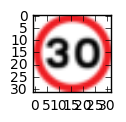

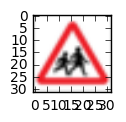

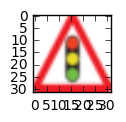

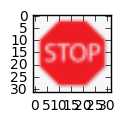

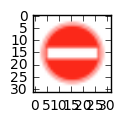

In [5]:
# Plotting all the images

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(1,1))
plt.imshow(test_image_1)  # 1

plt.figure(figsize=(1,1))
plt.imshow(test_image_2)  #28

plt.figure(figsize=(1,1))
plt.imshow(test_image_3)  #26

#plt.figure(figsize=(1,1))
#plt.imshow(test_image_4)  #33

plt.figure(figsize=(1,1))
plt.imshow(test_image_5)  # 14

plt.figure(figsize=(1,1))
plt.imshow(test_image_6)  #17

In [6]:
# RGB to Grayscale conversion

import tensorflow as tf

mock_test = tf.placeholder(tf.uint8, shape = final_list.shape)
mock_test_gray = tf.image.rgb_to_grayscale(mock_test)
with tf.Session() as sess:
    final_list = sess.run(mock_test_gray, feed_dict={mock_test:final_list})

In [7]:
#Normalizing the Input 

def normalize_grayscale(image_data):
    
    a = 0.1
    b = 0.9
    
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

In [8]:
# Function Call
final_list = normalize_grayscale(final_list)

In [9]:
# The architecture

from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
     
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x64.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #weight_norm = tf.nn.l2_loss(conv1_W)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 30x30x64. Output = 15x15x64.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    #Implementing DropOut 
    
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    
    #####################################################    

    # SOLUTION: Flatten. Input = 15x15x64. Output = 14400.
    fc0   = flatten(conv1)
    
    # SOLUTION: Layer 2: Fully Connected 1. Input = 14400. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(14400, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #weight_norm = tf.add(weight_norm, tf.nn.l2_loss(fc1_W))
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Implementing DropOut
    
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected 2. Input = 512. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #weight_norm = tf.add(weight_norm, tf.nn.l2_loss(fc2_W))
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)   
    
    
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 4: Fully Connected 3. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    #logits = tf.nn.dropout(fc3, keep_prob)
    
    #weight_norm = tf.add(weight_norm, tf.nn.l2_loss(fc3_W))
    
    return logits #,weight_norm

In [10]:
# defining placeholders 

x = tf.placeholder(tf.float32, (None,32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
logits = LeNet(x)

In [11]:
## Loading the saved Model from the Final_model.ckpt file saved after training. 

saver = tf.train.Saver()
save_file = 'Final_model.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    #logits = LeNet(x)
    output = sess.run(tf.nn.softmax(logits),feed_dict={x:final_list.astype(np.float32), keep_prob:1.0})
    output = sess.run(tf.nn.top_k(tf.constant(output), k=3))
    

In [12]:
### Visualize the softmax probabilities here.
output

TopKV2(values=array([[  9.63257194e-01,   2.68688742e-02,   8.88458081e-03],
       [  9.99999166e-01,   7.72375358e-07,   5.85366386e-08],
       [  3.47136796e-01,   3.44640046e-01,   2.57340997e-01],
       [  9.99994397e-01,   3.74129650e-06,   1.60154707e-06],
       [  1.00000000e+00,   6.60604225e-16,   1.84041565e-18]], dtype=float32), indices=array([[ 2,  3,  1],
       [28, 30, 20],
       [ 0, 37, 40],
       [14, 34, 38],
       [17, 14, 38]]))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


The accuracy based on the above predictions is 60%. Out of the 5 images, 3 images were rightly identified/classified by the classifier. From the Output value printed, we see that the sign correctly identified is 

** 1. ** 28 --> Children Crossing 

** 2. ** 14 --> Stop

** 3. ** 17 --> No Entry

The signs incorrectly classified are

** 1. ** 2 (incorrect ID) --> speed limit (30 km/hr)

** 2. ** 0 (incorrect ID) --> Traffic Signals


The test set accuracy was 92% -- which is higher than the test images used in this notebook.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.


 I was able to successfully, calculate the logits for each of the sample input, then computed the softmax probabilities. I then used the tf.nn.top_k() function to pick out the top three probabilities and the indices corresponding to these probabilities. Manually I calculated that the classifier successfully, classified 3 images out of the 5 input test images. This gave an accuracy of 60%. Compared to the validation set accuracy and the test set accuracy the performance is not upto the mark. There is definitely a need to further improve the classifier, by experimenting with deeper networks, and a larger uniform data set to be able to develop a more generalized classifier. 
 
 
 ** Does the Correct position appear in the top three? **
 
 The speed limit image was 30 km/hr (ID - 1), but the classifier suggested ID was 2. But it is interesting to note that the ID 1 features in the top 3 estimates of probabilities. This suggests that with more examples the classification between different speeds can be improved.
 
 However the image with the traffic signal had an ID-26 but the classifier estimated 0 as the label. This is way off and the correct answer does not feature in the top 3 estimates as well.
 
 
 